# 서울시 우리마을가게 상권분석서비스(추정매출)
- 데이터 링크 : http://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./서울시 우리마을가게 상권분석서비스(상권-추정매출).csv', encoding='cp949')

pd.set_option('display.max_columns',None)

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

In [ ]:
# 2022년 데이터만 존재
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,9548586,2264,...,29,102,2162,225,1414,409,118,83,15,6
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,103492276,370,...,0,370,0,0,0,0,0,370,0,4
2,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,55855797,130,...,0,0,130,0,0,130,0,0,0,6
3,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,8443170204,4794,...,0,2151,2643,0,105,388,987,1164,2150,6
4,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,576420408,8392,...,6,4326,3023,72,1757,2508,1961,650,398,5


In [ ]:
data.isnull().sum()

기준_년_코드            0
기준_분기_코드           0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
                  ..
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
점포수                0
Length: 80, dtype: int64

# 시각화
- 

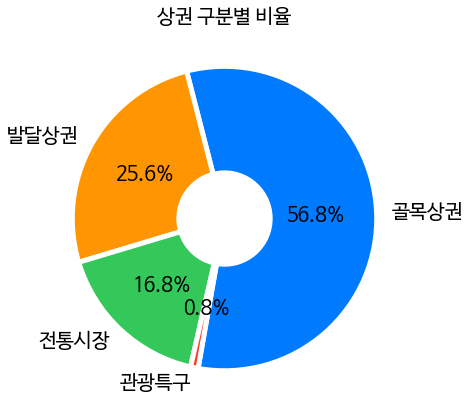

In [ ]:
# 상권 구분
plt.figure(figsize=(15,7))
plt.pie(data['상권_구분_코드_명'].value_counts(),
          labels=data['상권_구분_코드_명'].value_counts().index,
          autopct='%.1f%%',
          startangle=260,
          wedgeprops=wedgeprops,
          colors=light_palette,
          textprops = {'fontsize':20})
plt.title('상권 구분별 비율',size=20)
plt.show()

- 골목상권의 비율이 약 57%로 가장 높았으며, 관광특구의 경우 0.8%로 비율이 매우 적었다.

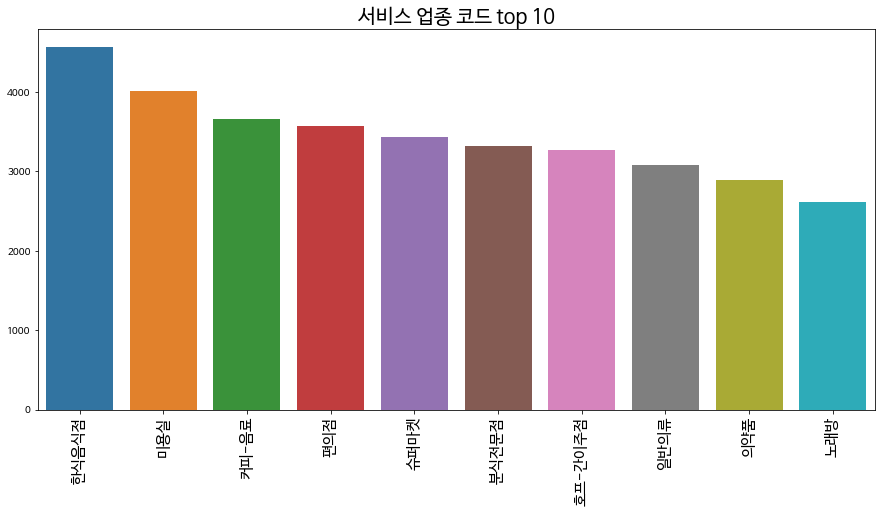

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = data['서비스_업종_코드_명'].value_counts().index[:10], y = data['서비스_업종_코드_명'].value_counts()[:10])
plt.xticks(rotation=90,size=15)
plt.title('서비스 업종 코드 top 10',size=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

- 전체 서비스 업종 중 한식음식점이 가장 높은 비율을 차지하고 있었으며, 2위는 미용실, 3위는 커피, 4위는 편의점 등으로 나타났다. 

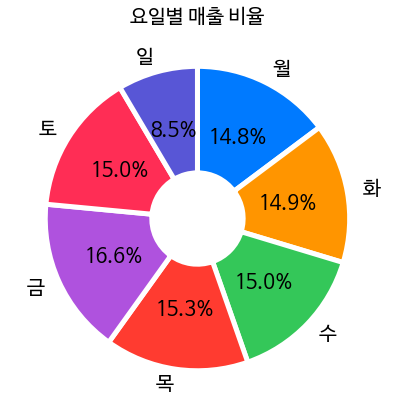

In [ ]:
day_cost = []
for i in range(7):
  day_cost.append(data[data.columns[12+i]].mean())

plt.figure(figsize=(15,7))
plt.pie(day_cost,
          labels=['월','화','수','목','금','토','일'],
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':20})
plt.title('요일별 매출 비율',size=20)
plt.show()

- 금요일의 매출 비율이 16.6%로 다른 요일에 비해 조금 높게 나타났고, 일요일은 8.5%로 매출 비율이 낮게 나타났다.

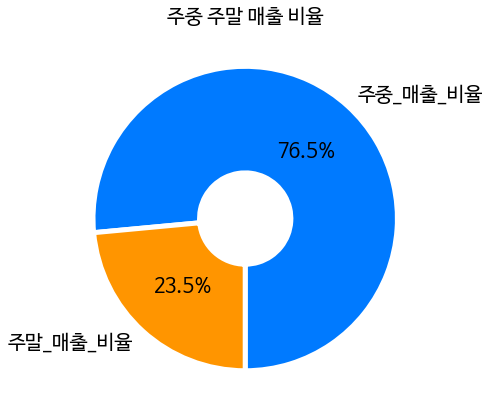

In [ ]:
plt.figure(figsize=(15,7))
plt.pie([data['주중_매출_비율'].mean(),data['주말_매출_비율'].mean()],
          labels=['주중_매출_비율','주말_매출_비율'],
          autopct='%.1f%%',
          startangle=270,
          wedgeprops=wedgeprops,
          colors=light_palette,
          textprops = {'fontsize':20})
plt.title('주중 주말 매출 비율',size=20)
plt.show()

- 주말보다는 주중 매출 비율이 훨씬 높다.

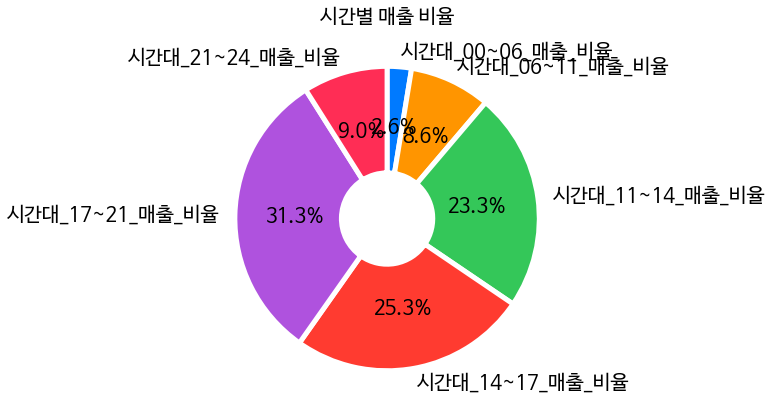

In [ ]:
v = []
n = []
for i in range(6):
  v.append(data[data.columns[19+i]].mean())
  n.append(data.columns[19+i])

plt.figure(figsize=(15,7))
plt.pie(v,
          labels=n,
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':20})
plt.title('시간별 매출 비율',size=20)
plt.show()

- 밤보다는 낮시간의 매출 비율이 높으며, 특히 저녁시간대의 매출 비율이 31.3%로 가장 높았다.

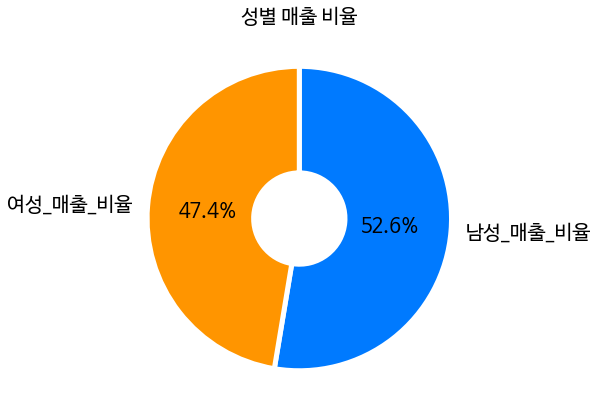

In [ ]:
v = []
n = []
for i in range(2):
  v.append(data[data.columns[25+i]].mean())
  n.append(data.columns[25+i])

plt.figure(figsize=(15,7))
plt.pie(v,
          labels=n,
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':20})
plt.title('성별 매출 비율',size=20)
plt.show()

- 남성의 매출 비율이 여성보다 조금 높은 52.6%로 나타났다.

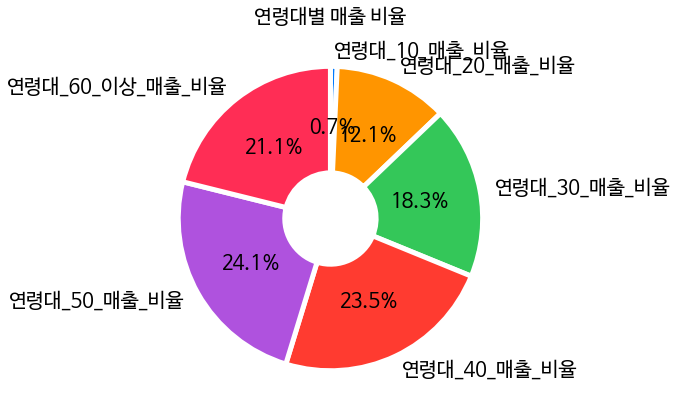

In [ ]:
v = []
n = []
for i in range(6):
  v.append(data[data.columns[27+i]].mean())
  n.append(data.columns[27+i])

plt.figure(figsize=(15,7))
plt.pie(v,
          labels=n,
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':20})
plt.title('연령대별 매출 비율',size=20)
plt.show()

- 10대의 매출 비율은 매우 적으며, 가장 높은 매출 비율은 24.1%로 50대이다.

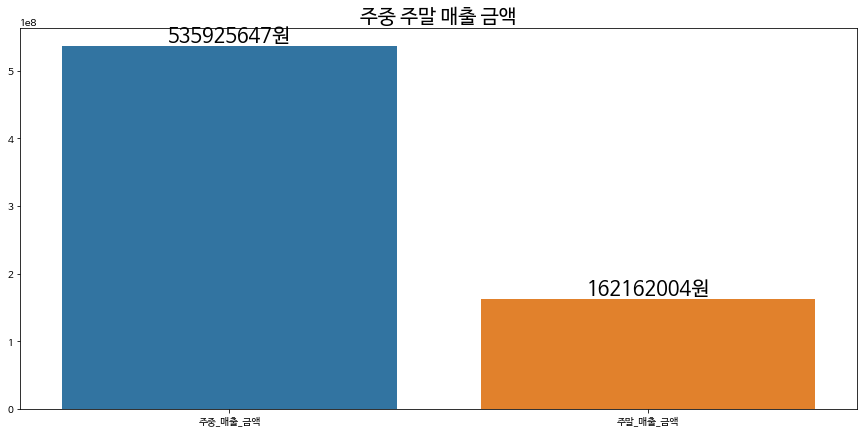

In [ ]:
v = []
n = []
for i in range(2):
  v.append(data[data.columns[33+i]].mean())
  n.append(data.columns[33+i])

plt.figure(figsize=(15,7))
ax = sns.barplot(x = n, y = v)

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height() + '원', (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points')
    
plt.title('주중 주말 매출 금액',size=20)
plt.show()

- 주중 매출 금액 평균은 약 5억 4천만원이며, 주말 매출 금액의 평균은 약 1억 6천만원이다.

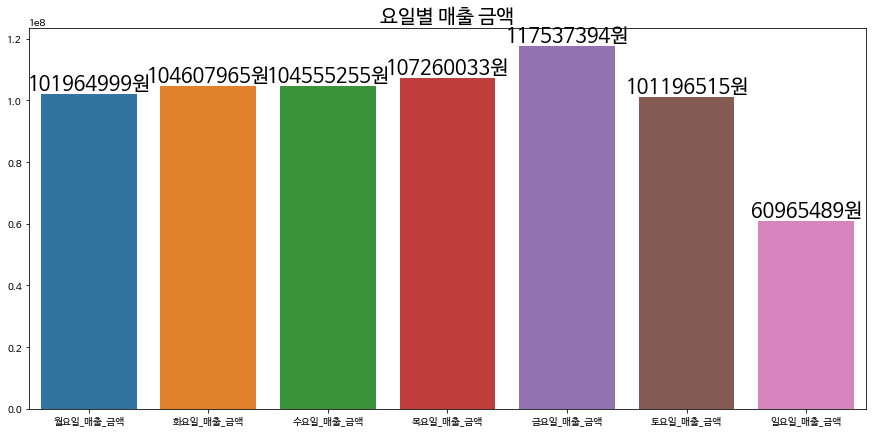

In [ ]:
v = []
n = []
for i in range(7):
  v.append(data[data.columns[35+i]].mean())
  n.append(data.columns[35+i])

plt.figure(figsize=(15,7))
ax = sns.barplot(x = n, y = v)

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height() + '원', (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points')
    
plt.title('요일별 매출 금액',size=20)
plt.show()

- 금요일의 매출 금액 평균이 약 1억 1750만원으로 가장 높았으며, 일요일이 약 6천만원으로 가장 낮았다.

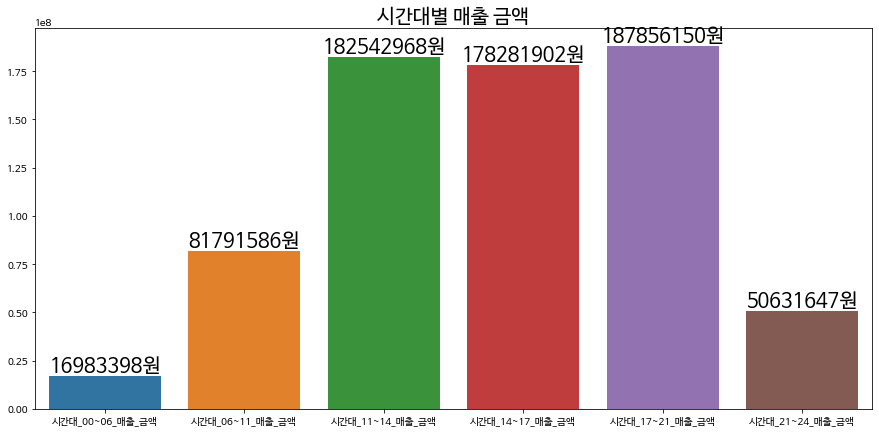

In [ ]:
v = []
n = []
for i in range(6):
  v.append(data[data.columns[42+i]].mean())
  n.append(data.columns[42+i])

plt.figure(figsize=(15,7))
ax = sns.barplot(x = n, y = v)

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height() + '원', (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points')
    
plt.title('시간대별 매출 금액',size=20)
plt.show()

- 사람들이 많이 활동하는 시간인 11~21시의 매출 금액 평균이 약 1억 8천이었으며, 이른 아침과 밤은 낮에 비해 낮게 나타났다.

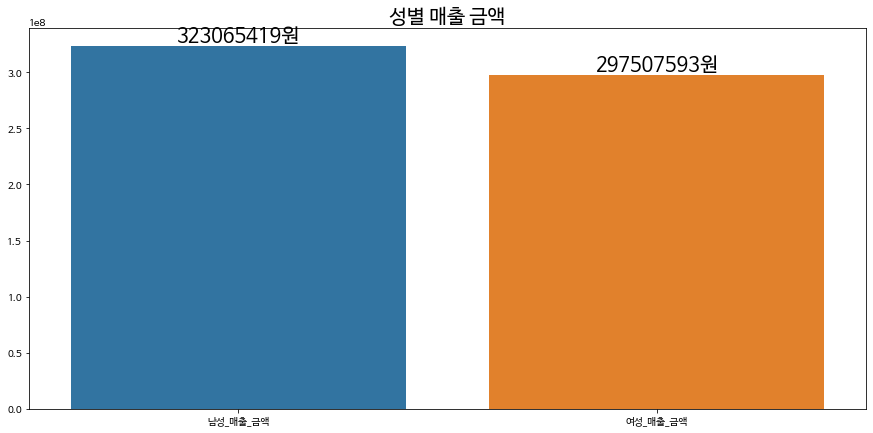

In [ ]:
v = []
n = []
for i in range(2):
  v.append(data[data.columns[48+i]].mean())
  n.append(data.columns[48+i])

plt.figure(figsize=(15,7))
ax = sns.barplot(x = n, y = v)

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height() + '원', (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points')
    
plt.title('성별 매출 금액',size=20)
plt.show()


- 남성의 매출 금액이 여성보다 조금 더 높은 약 3억 2천만원 정도로 나타났다.

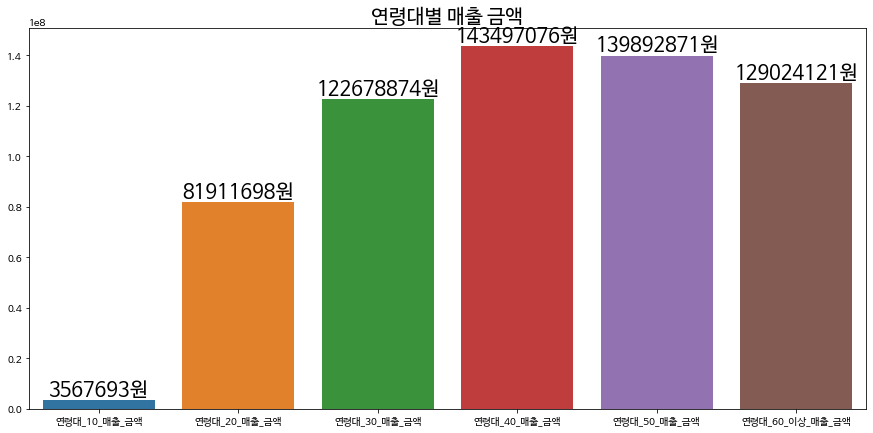

In [ ]:
v = []
n = []
for i in range(6):
  v.append(data[data.columns[50+i]].mean())
  n.append(data.columns[50+i])

plt.figure(figsize=(15,7))
ax = sns.barplot(x = n, y = v)

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height() + '원', (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points')
    
plt.title('연령대별 매출 금액',size=20)
plt.show()

- 40대의 매출 금액이 약 1억 4천만원으로 가장 크게 나타났으며, 10대가 약 350만원으로 가장 적었다.

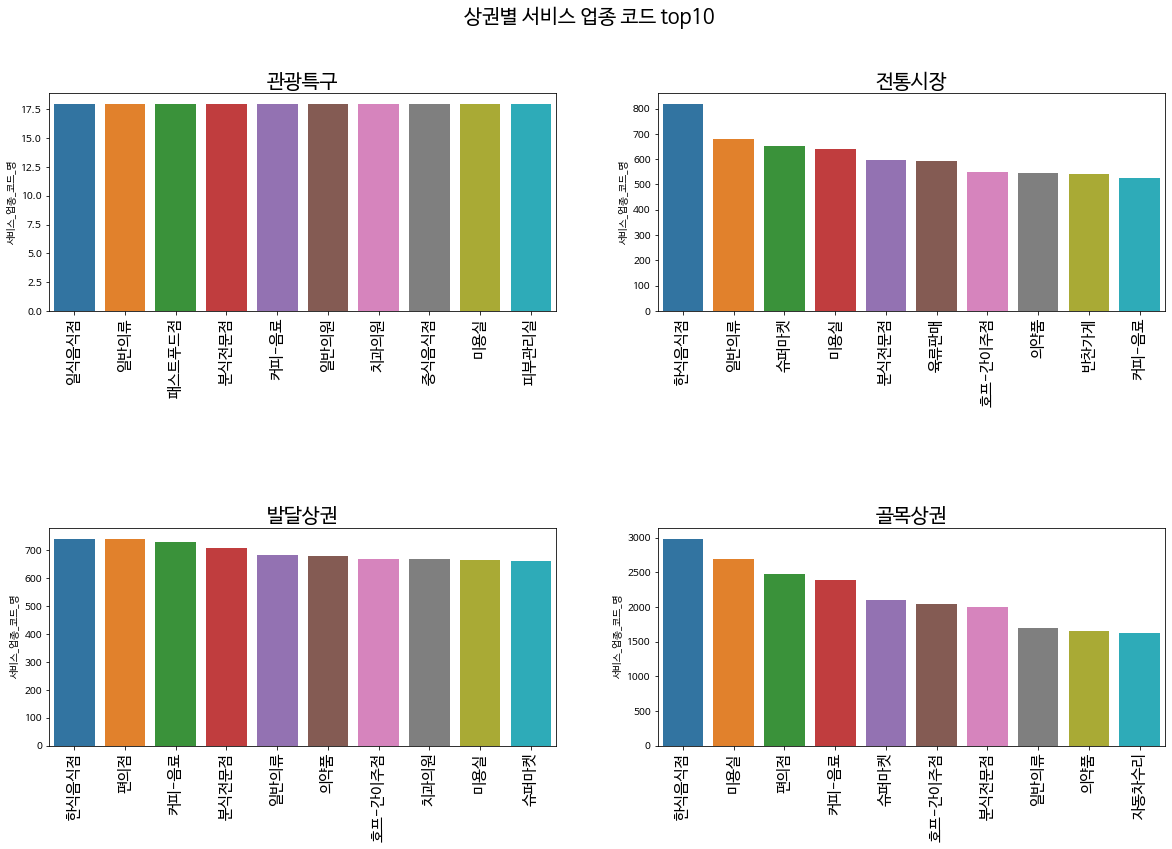

In [ ]:
plt.figure(figsize=(20,12))
plt.subplots_adjust(hspace=1)

for i in range(4):
  code_df = data[data['상권_구분_코드_명'] == data['상권_구분_코드_명'].unique()[i]]
  plt.subplot(2,2,i+1)
  sns.barplot(x = code_df['서비스_업종_코드_명'].value_counts().index[:10], y = code_df['서비스_업종_코드_명'].value_counts()[:10])

  plt.xticks(rotation=90,size=15)
  plt.title(data['상권_구분_코드_명'].unique()[i],size=20)

plt.suptitle('상권별 서비스 업종 코드 top10',size=20)
plt.show()

- 관광특구를 제외한 모든 상권에서 한식음식점이 1위로 나타났으며, 관광특구에서는 일반음식점이 가장 많았다.
- 발달상권에서는 편의점과 커피-음료가 2,3위였으며, 식사 후 편의점과 카페를 이용하는 사람들이 많기 때문이라고 생각된다.
- 비교적 연령대가 높다고 생각되는 전통시장에서는 2위가 일반의류, 3위가 슈퍼마켓으로 시장에서 의류를 사거나 편의점보다는 슈퍼마켓이 익숙하신 어르신들이 많이 이용할 것으로 추측된다.
- 골목상권에서는 미용실과 편의점이 각각 2,3위를 차지하였으며, 해당 서비스들이 골목에 위치하기 좋은 서비스들이기 때문이라고 생각된다.

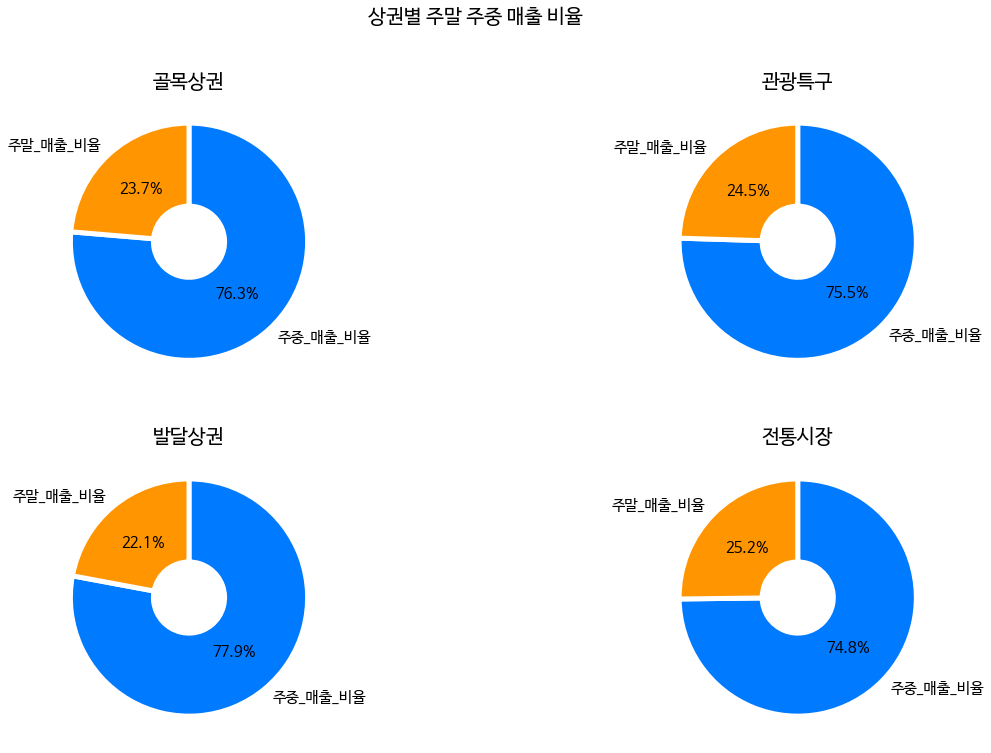

In [ ]:
code_df = data.groupby('상권_구분_코드_명').sum()

plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.pie(code_df.iloc[i,5:7],
          labels=code_df.columns[5:7],
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':15})

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 주말 주중 매출 비율',size=20)
plt.show()

- 전체적으로 모든 상권에서 주중 매출비율이 높았다.

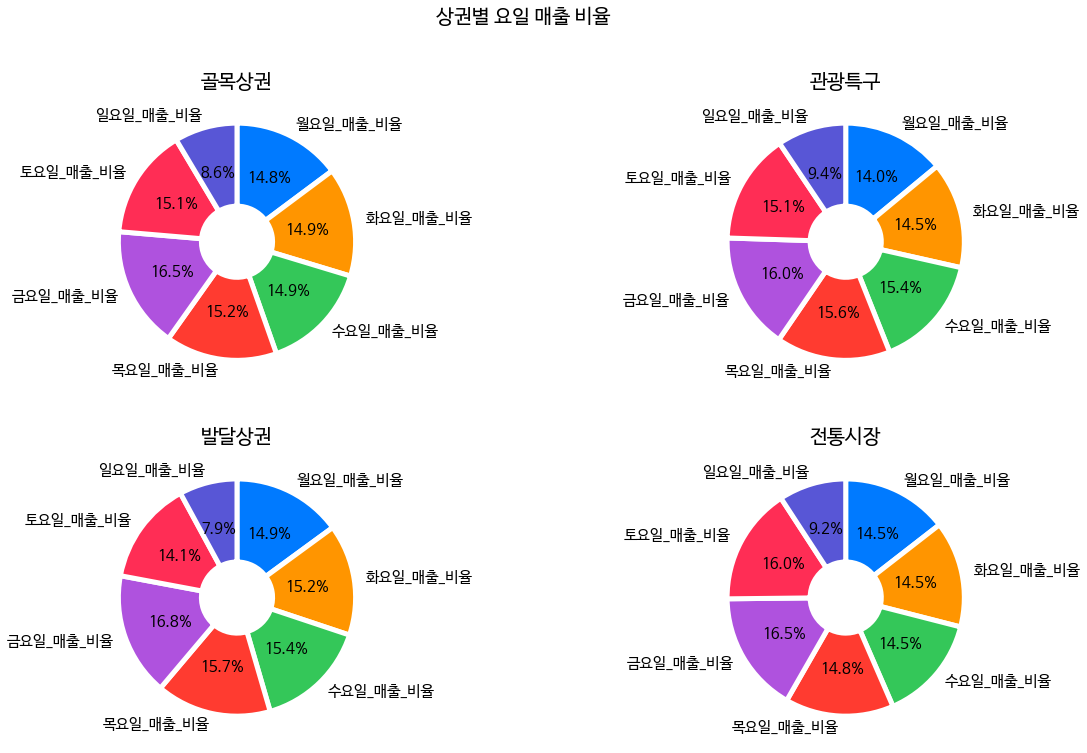

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.pie(code_df.iloc[i,7:14],
          labels=code_df.columns[7:14],
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':15})

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 요일 매출 비율',size=20)  
plt.show()

- 전체적으로 금요일의 매출 비율이 가장 높았다.
- 발달상권의 경우 주중 다른 상권들에 비해 조금 더 활성화가 되어 있기에 주중 매출 비율이 조금 더 높게 나타난것으로 보인다.

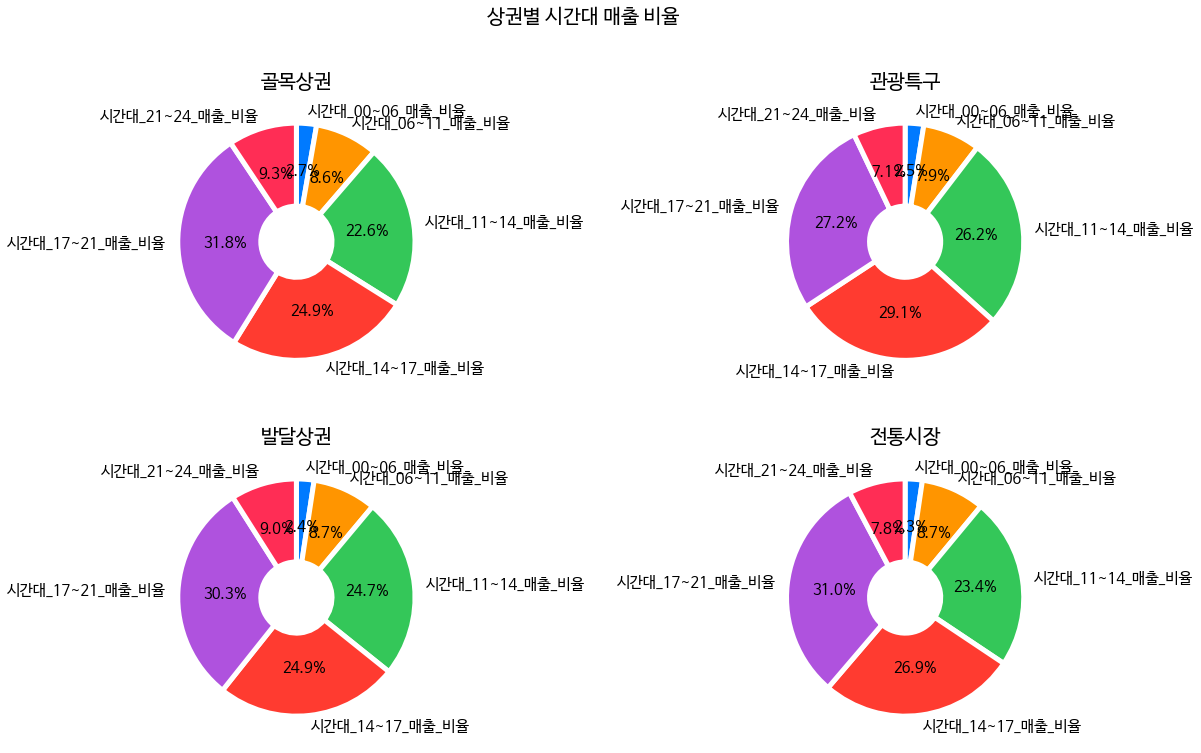

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.pie(code_df.iloc[i,14:20],
          labels=code_df.columns[14:20],
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':15})

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 시간대 매출 비율',size=20)  
plt.show()

- 퇴근 이후 서비스를 이용하는 사람들이 많기 때문에, 관광특구를 제외한 나머지 상권에서 17 ~ 21시의 매출 비율이 가장 높게 나타난 것으로 생각된다.
- 관광특구는 비교적 이른 시간대의 매출 비율이 높은 것을 보이며, 14 ~ 17시가 가장 높았다.

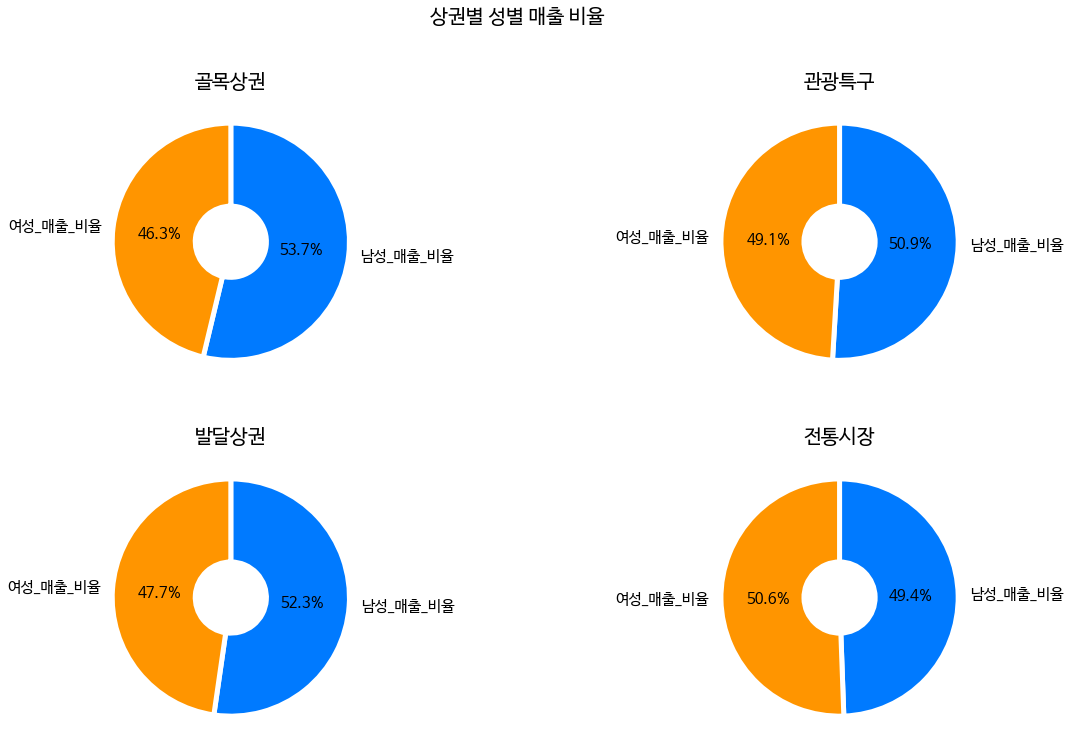

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.pie(code_df.iloc[i,20:22],
          labels=code_df.columns[20:22],
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':15})

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 성별 매출 비율',size=20)  
plt.show()

- 골목상권과 발달상권에서 남성의 매출 비율이 여성보다 약 6%가량 높게 나타났으며, 그 외의 상권에서는 여성과 남성이 비슷하게 나타났다.

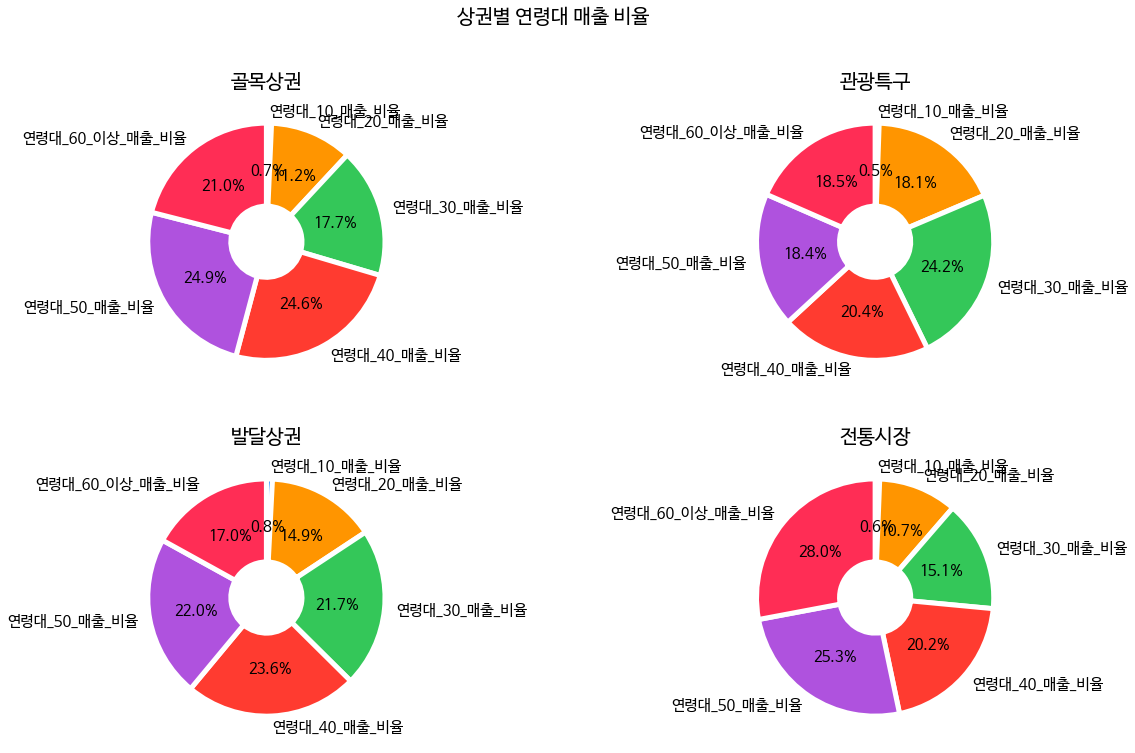

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.pie(code_df.iloc[i,22:28],
          labels=code_df.columns[22:28],
          autopct='%.1f%%',
          startangle=90,
          wedgeprops=wedgeprops,
          counterclock=False,
          colors=light_palette,
          textprops = {'fontsize':15})

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 연령대 매출 비율',size=20)  
plt.show()

- 전통시장의 경우 60대 이상이 28%로 가장 높았으며, 다른 상권들에 비해 비교적 연령대가 높았다.
- 전통시장 > 골목상권 > 발달상권 > 관광특구 순서로 연령대가 낮아진다.

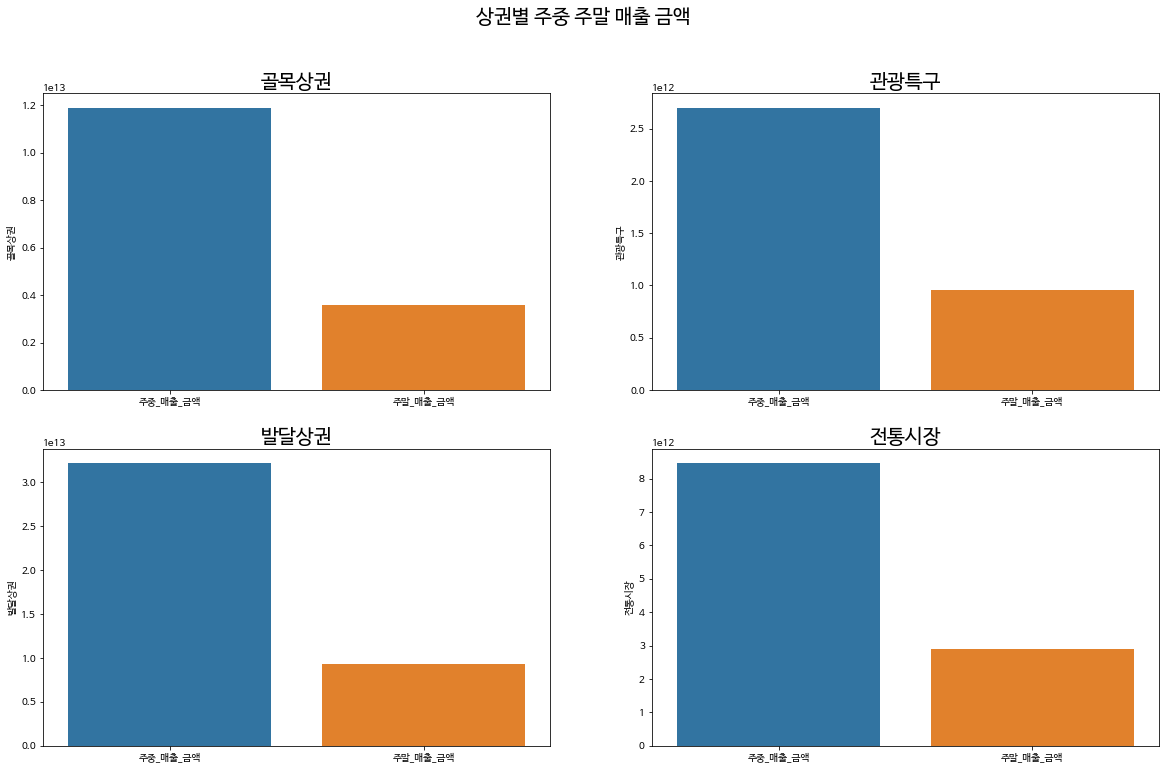

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x = code_df.columns[28:30], y=code_df.iloc[i,28:30] )

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 주중 주말 매출 금액',size=20)
plt.show()

- 매출 비율과 마찬가지로 주중 매출 금액이 주말보다 훨씬 크다.

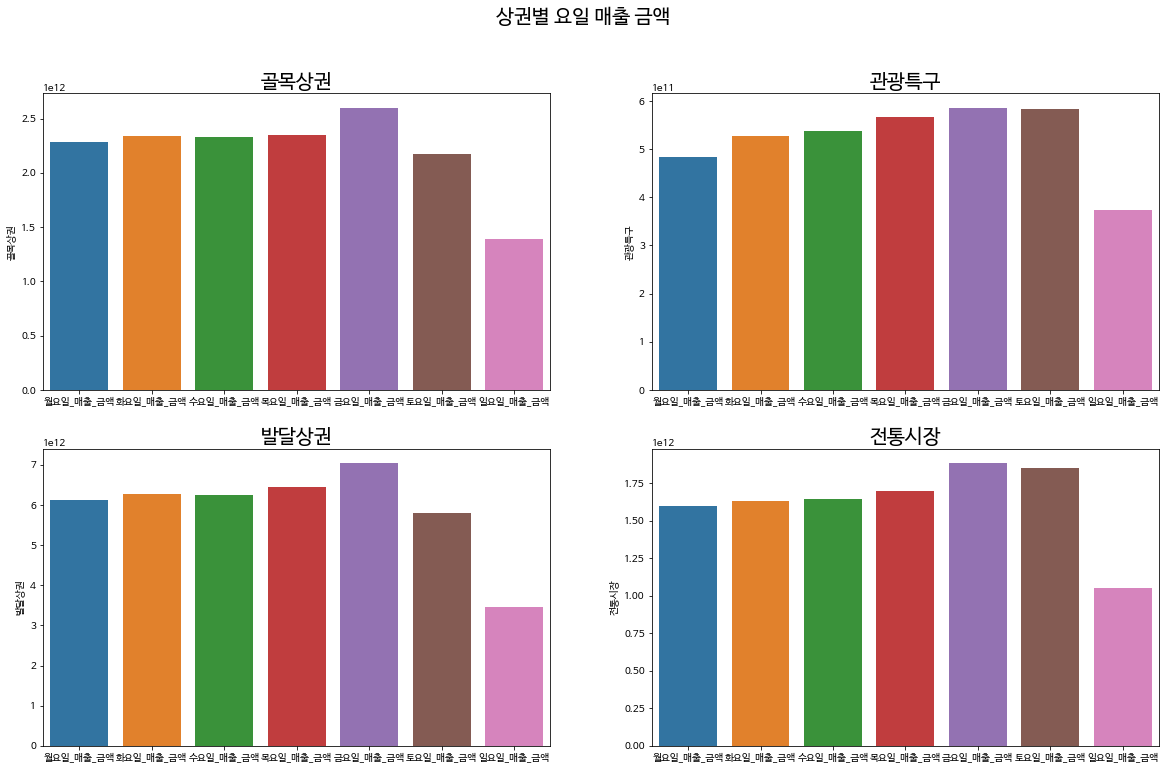

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x = code_df.columns[30:37], y=code_df.iloc[i,30:37] )

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 요일 매출 금액',size=20)
plt.show()

- 매출 비율과 마찬가지로 매출 금액 또한 금요일이 가장 컸다.

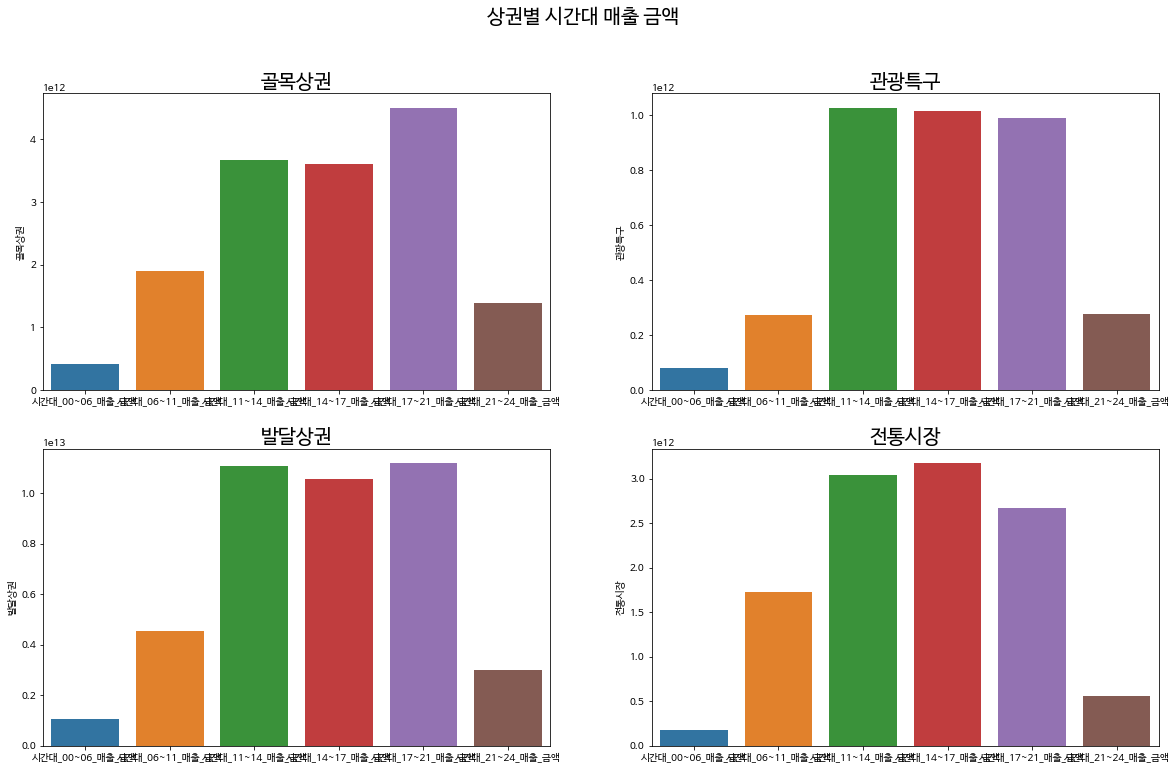

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x = code_df.columns[37:43], y=code_df.iloc[i,37:43] )

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 시간대 매출 금액',size=20)
plt.show()

- 시간대별 매출 금액 역시 관광특구에서 비교적 이른 시간의 매출 금액이 컸으며, 전체적으로 11 ~ 21시의 매출 금액이 큰 것을 볼 수 있다.

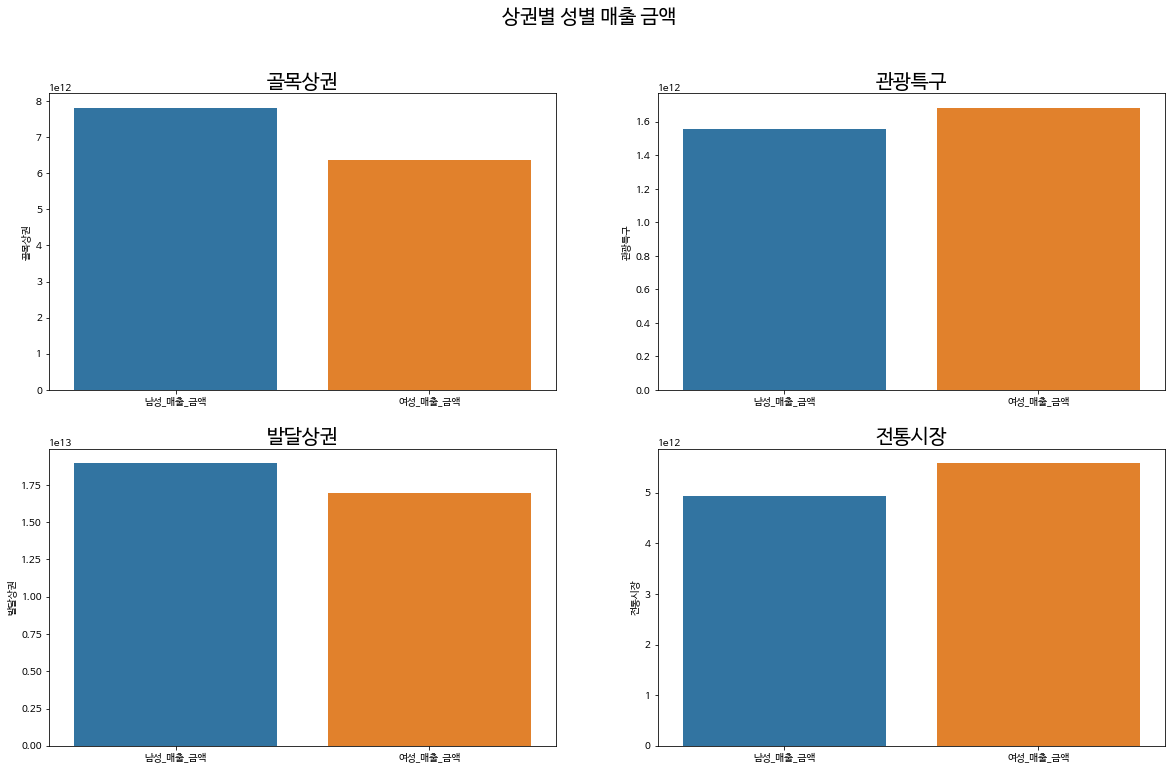

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x = code_df.columns[43:45], y=code_df.iloc[i,43:45] )

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 성별 매출 금액',size=20)
plt.show()

- 골목상권과 발달상권은 성별 비율과 비례하여 남성이 여성보다 매출 금액이 크게 나타났다.
- 하지만, 관광특구와 전통시장의 경우 성별 매출 비율은 비슷했지만 매출 금액에서는 여성이 남성보다 더 크게 나타났다.


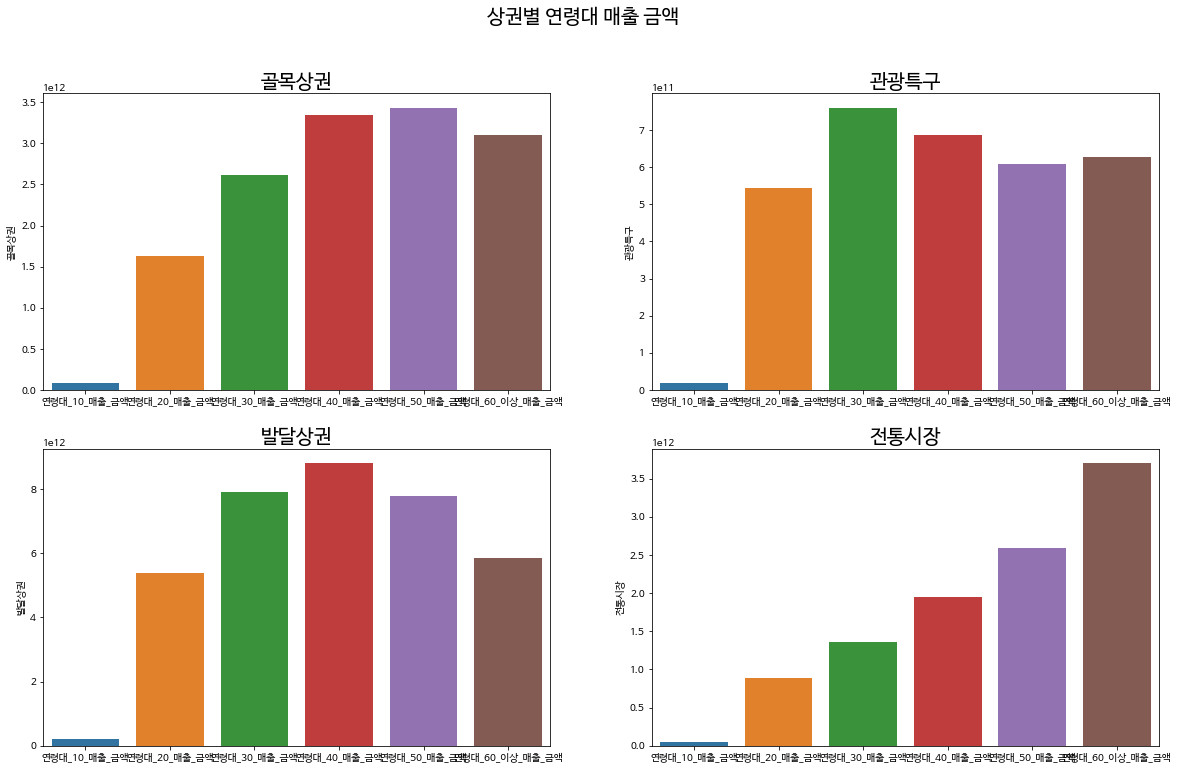

In [ ]:
plt.figure(figsize=(20,12))

for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x = code_df.columns[45:51], y=code_df.iloc[i,45:51] )

  plt.title(code_df.index[i],size=20)

plt.suptitle('상권별 연령대 매출 금액',size=20)
plt.show()

- 전통시장은 연령대가 높아질수록 매출 금액이 높아지는 것을 볼 수 있었으며, 관광특구는 연령대가 비교적 낮기 때문에 30대의 매출 금액이 가장 크게 나타났다.